In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

seg_df = pd.read_csv('http://bit.ly/PMR-ch5')



In [2]:
#Testing Group Frequencies: scipy.stats.chisquare()

#Create test data for observations to look at frequency and chisquare
tmp = np.repeat(range(4),[25,25,25,20])
tmp

#Use nunique to get count of each value
tmp_values, tmp_counts = np.unique(tmp,return_counts = True)
tmp_counts

#Import scipy and stats
from scipy import stats
stats.chisquare(tmp_counts)
#Shows 85% chance of seeing a dataset with differences similar to ours

#changing observations to see a different number
tmp_values, tmp_counts = np.unique(np.repeat(range(4),[25,25,25,10]),
                                   return_counts = True)
print(tmp_counts)
print(stats.chisquare(tmp_counts))
print('Expected values: {}'.format(np.ones(4)*tmp_counts.sum()/4))

#Same data but 1/5 to see difference
tmp_counts_small = tmp_counts / 5
print(tmp_counts_small)
print(stats.chisquare(tmp_counts_small))
print('Expected values: {}'.format(np.ones(4)*tmp_counts_small.sum()/4))

#Looking at high differences
tmp_counts_large = tmp_counts * 10 + 1900
print(tmp_counts_large)
print(stats.chisquare(tmp_counts_large))
print('Expected values: {}'.format(np.ones(4)*tmp_counts_large.sum()/4))


#Looking at our segment data and chisquare - are they sig different? - Yes
segment_values, segment_counts = np.unique(seg_df.Segment,
                                           return_counts = True)
print(segment_counts)
stats.chisquare(segment_counts)

#Using the value_counts() to look at segment counts
seg_df.Segment.value_counts()

#value_counts can be passed directly to chisquare
stats.chisquare(seg_df.Segment.value_counts())

#Using crosstab() and test with chisquare_contigency()
pd.crosstab(seg_df.subscribe, columns = seg_df.own_home)
stats.chi2_contingency(pd.crosstab(seg_df.subscribe
                                   , columns = seg_df.own_home))
#Making more readable
sub_by_home = pd.crosstab(seg_df.subscribe, columns = seg_df.own_home)

print('chisq_stat: {0}\npavule: {1}\ndof: {2}\nexpected_values: {3}'
      .format(*stats.chi2_contingency(sub_by_home,
                                      correction = False)))



[25 25 25 10]
Power_divergenceResult(statistic=np.float64(7.9411764705882355), pvalue=np.float64(0.04724318343092867))
Expected values: [21.25 21.25 21.25 21.25]
[5. 5. 5. 2.]
Power_divergenceResult(statistic=np.float64(1.5882352941176472), pvalue=np.float64(0.6620603202525777))
Expected values: [4.25 4.25 4.25 4.25]
[2150 2150 2150 2000]
Power_divergenceResult(statistic=np.float64(7.988165680473372), pvalue=np.float64(0.04625691960442831))
Expected values: [2112.5 2112.5 2112.5 2112.5]
[ 70 100  80  50]
chisq_stat: 2.6737316360934784
pavule: 0.10201657409843726
dof: 1
expected_values: [[147.51666667 117.48333333]
 [ 19.48333333  15.51666667]]


In [3]:
#Testing Observed Proportions: binom_test()

from statsmodels.stats import proportion as sms_proportion

#Using statsmodels.proportion.binom_test() to get pvalue
sms_proportion.binom_test(count = 12, nobs = 20, prop = 0.5)

#Adding in a confidence level of 95%
sms_proportion.proportion_confint(count = 12, nobs = 20, alpha = 0.05)
#Shows the range which includes 50%, does not show more of one or the other

#Look at larger sample sizes binom_test()
sms_proportion.binom_test(count = 120, nobs = 200, prop = 0.5)

#Look at larger sample size CI 95%
sms_proportion.proportion_confint(count = 120, nobs = 200, alpha = 0.05)

#Using stats.binom and density estimate and sum point probs
stats.binom.pmf([8, 9, 10, 11, 12], p = 0.5, n = 20).sum()
stats.binom.pmf(range(8,13), p=0.5, n = 20).sum()

#Using proportion_confit- agresti_coull
sms_proportion.proportion_confint(0,20, method = 'agresti_coull')

(0.0, 0.18980956054248888)

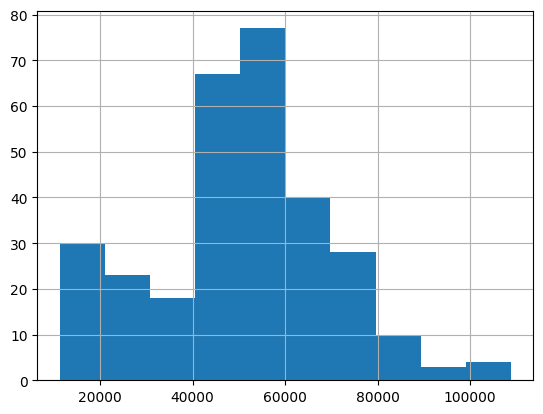

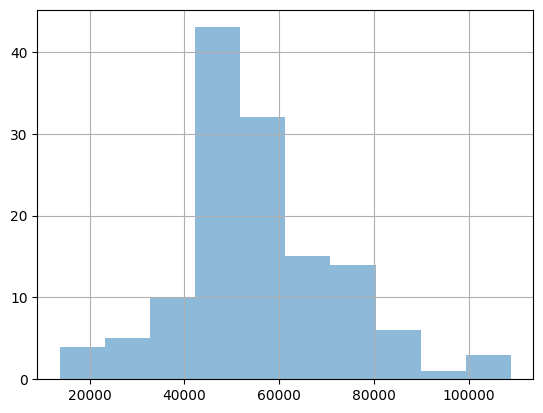

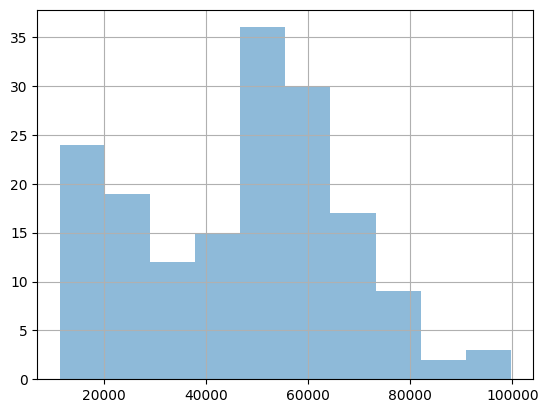

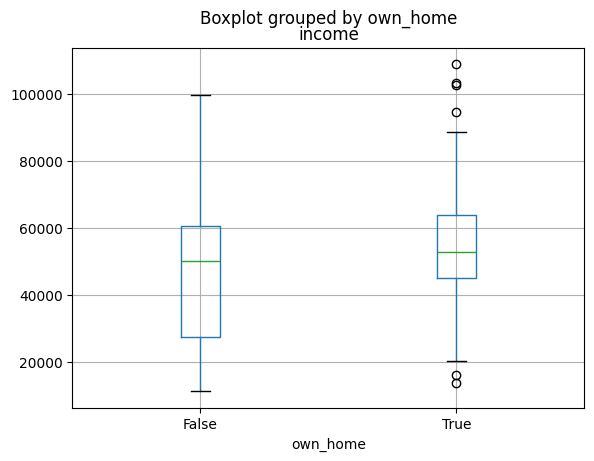

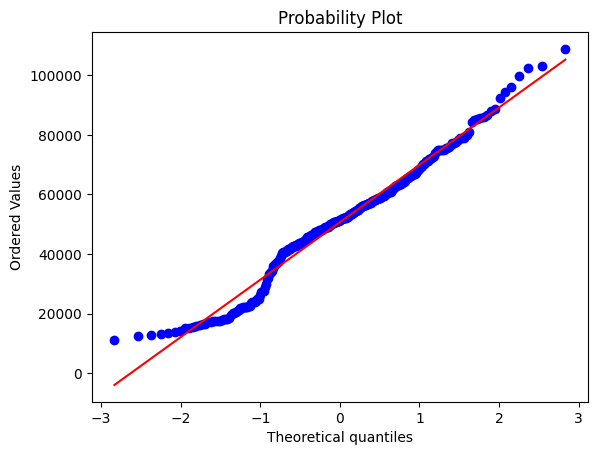

Group a - mean: 46892.35166199144 standard deviation 20335.071080860194
Group b - mean: 55412.13190716666 standard deviation 16917.482476619334
Welchs t-teststatistic:-3.960321465078199
p.value:9.372809221211885e-05

95% CI of the mean difference between a and b:
(np.float64(-11525.353750453669), np.float64(-5514.206739896775))
Group a - mean: 62923.233941015686 standard deviation 22233.49397700984
Group b - mean: 62449.90773236651 standard deviation 19580.36093716456
Welchs t-teststatistic:0.09365502472389607
p.value:0.925781815932494

95% CI of the mean difference between a and b:
(np.float64(-2567.2070466991167), np.float64(3513.859463997465))


In [29]:
#Testing group means: t-test

from scipy import stats

#Plotting income to look for outliers, skweness
income_own_home = seg_df.income[seg_df.own_home]
income_dont_own_home = seg_df.income[~seg_df.own_home]

seg_df.income.hist()
plt.show()
income_own_home.hist(alpha = 0.5)
plt.show()
income_dont_own_home.hist(alpha = 0.5)
plt.show()
seg_df.boxplot(column = 'income', by = 'own_home')
plt.figure()
_ = stats.probplot(seg_df.income, dist = 'norm', plot = plt)
plt.show()

#measure whether income can be explained  by own_home
# sample mean and stan dev. 
income_dont_own_home.mean(), income_dont_own_home.std()
income_own_home.mean(), income_own_home.std()

#Running t-test with scipy.stats.ttest_ind()
stats.ttest_ind(income_dont_own_home, income_own_home,
                equal_var = False)

#Look at the 95% CI. Using Stats.t.interval()

count_dont_own_home = income_dont_own_home.shape[0]
count_own_home = income_own_home.shape[0]
dof = count_dont_own_home + count_own_home - 2
geometric_mean_sem = np.sqrt(((count_dont_own_home - 1)
                              * stats.sem(income_dont_own_home) ** 2
                              + (count_own_home - 1)
                              *stats.sem(income_own_home) ** 2) / dof)
stats.t.interval(confidence= 0.95,
                 #alpha = 0.95,
                 df = dof,
                 loc = income_dont_own_home.mean()\
                    - income_own_home.mean(),
                 scale = geometric_mean_sem)

#Creating a t-test function
def ttest(a, b):
    #This function displays statistics on two groups, runs a t-test,
    # and finds the 95% confidence intercal of the mean difference
    # between groups

    #Get means and stdev 
    mean_a = a.mean()
    mean_b = b.mean()

    std_a = a.std()
    std_b = b.std()

    print('Group a - mean: {0} standard deviation {1}'
          .format(mean_a, std_a))
    print('Group b - mean: {0} standard deviation {1}'
          .format(mean_b, std_b))

    #Run a Welch's T-Test between groups
    ttest_out = stats.ttest_ind(a,b,equal_var = False)
    print('Welchs t-teststatistic:{0}\np.value:{1}\n'
          .format(ttest_out.statistic,ttest_out.pvalue))

    #Find the 95% CI using scipy.statst.interval function
    # The difference in means is the location of the 
    # distribution (loc parm.) This geometric mean of the 
    # standard error of each group is the scale

    count_a = a.shape[0]
    count_b = b.shape[0]
    dof = count_a + count_b - 2

    geometirc_mean_sem = np.sqrt(((count_a - 1) * stats.sem(a) ** 2 
                                  + (count_b - 1) * stats.sem(b) ** 2)/dof)
    print('95% CI of the mean difference between a and'
          ' b:\n{0}'.format(stats.t.interval(confidence = 0.95,
                                            df = dof,
                                            loc = mean_a - mean_b,
                                            scale = geometric_mean_sem)))
    
#Testing the new function to ensure it works properly
ttest(income_dont_own_home,income_own_home)


#Looking at the travelers segment and income
travelers_subset = seg_df.loc[seg_df.Segment == 'travelers']
ttest(travelers_subset.income[~travelers_subset.own_home],
      travelers_subset.income[travelers_subset.own_home])

In [ ]:
#ANOVA